<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/grokking-machine-learning/10-neural-networks/01_neural_network_boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The boundary of a neural network

In this notebook, we illustrate a combination of the boundaries of the two input perceptrons and the bias node.

The boundary obtained with the step activation function is made by **broken lines**, whereas the one obtained with the sigmoid activation function is a **curve**.

##Setup

In [ ]:
!wget https://github.com/luisguiserrano/manning/raw/master/Chapter_10_Neural_Networks/utils.py

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import *

import warnings
warnings.simplefilter("ignore", UserWarning)

##Dataset

We begin by generating a synthetic dataset.

In [ ]:
alien_dataset = pd.DataFrame({
  "aack": [1,2,0,0,1,1,2,2],
  "beep": [0,0,1,2,1,2,1,2],
  "happy": [0,0,0,0,1,1,1,1]
})

X = alien_dataset[["aack", "beep"]]
y = alien_dataset["happy"]

##Activation function

In [ ]:
def plot_function(f):
  plot_points(X, y, 100)

  def h(x,y):
      return f(x,y)>=0.5
  xx, yy = np.meshgrid(np.arange(-0.5,3,0.005), np.arange(-0.5,3,0.005))
  Z = np.array([h(i[0], i[1]) for i in np.c_[xx.ravel(), yy.ravel()]])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.25, levels=range(-1,2))
  plt.contour(xx, yy, Z,colors = 'k',linewidths = 3)
  plt.show()

In [ ]:
def step(x):
  if x >= 0:
    return 1
  else:
    return 0

def line_1(a, b):
  return step(6 * a + 10 * b - 15)

def line_2(a, b):
  return step(10 * a + 6 * b - 15)

def bias(a, b):
  return 1

def nn_with_step(a, b):
  return step(step(6 * a + 10 * b - 15) + step(10 * a + 6 * b - 15) - 1.5)

def sigmoid(x):
  return np.exp(x) / (1.0 + np.exp(x))

def nn_with_sigmoid(a, b):
  return sigmoid(1.0 * sigmoid(6 * a + 10 * b - 15) + 1.0 * sigmoid(10 * a + 6 * b - 15) - 1.5)

##Boundaries

Let's plot boundary of first layer for linear classifiers and bias.

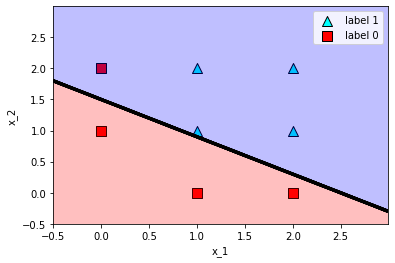

In [ ]:
plot_function(line_1)

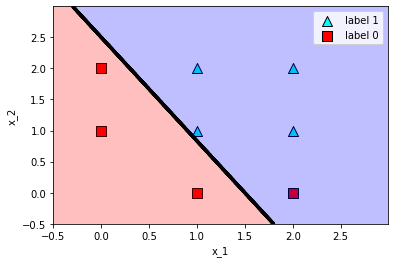

In [ ]:
plot_function(line_2)

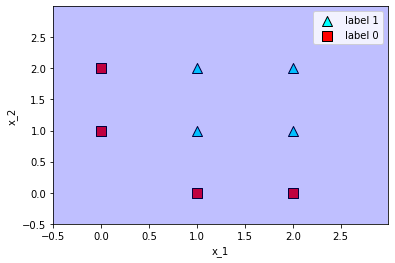

In [ ]:
plot_function(bias)

Let's plot boundary of second layer for non-linear classifiers.

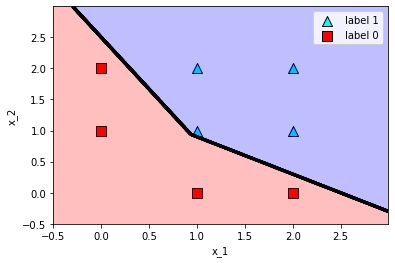

In [ ]:
plot_function(nn_with_step)

As we see the boundary obtained using the step function, which is a **broken line**.

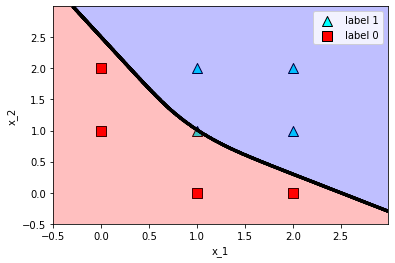

In [ ]:
plot_function(nn_with_sigmoid)

As we see the obtained using the sigmoid function, which
is a **curve**.